## ETL WEB SCRAPPING

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL base do site
base_url = 'https://www.dfimoveis.com.br/aluguel/df/todos/ponto-comercial?pagina={}'

# Lista para armazenar os dados de todas as páginas
all_data = []

# Iterar sobre todas as páginas
page_number = 1
while True:
    # Montar a URL da página atual
    url = base_url.format(page_number)

    # Fazendo a requisição GET
    response = requests.get(url)

    # Verificando se a requisição foi bem-sucedida
    if response.status_code == 200:
        # Parseando o HTML com BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')

        # Encontrando os elementos desejados
        items = soup.find_all('div', class_='new-info')

        # Se não houver mais itens na página, sair do loop
        if not items:
            break

        # Iterando sobre os itens encontrados na página atual
        for item in items:
            # Extraindo informações
            titulo = item.find('h2', class_='new-title phrase').text.strip()
            preco = item.find('div', class_='new-price').text.strip()
            descricao = item.find('div', class_='new-text phrase').text.strip()

            # Extraindo informações sobre o tamanho do imóvel
            detalhes = item.find('ul', class_='new-details-ul')
            spans = detalhes.find_all('span')

            tamanho = ''
            for span in spans:
                if 'm²' in span.text:
                    tamanho = span.text.strip()

            # Adicionando os dados à lista de todos os dados
            all_data.append({
                'Título': titulo,
                'Preco': preco,
                'Descrição': descricao,
                'Tamanho': tamanho
            })

        # Incrementando o número da página para a próxima iteração
        page_number += 1
    else:
        print(f'Não foi possível acessar a página {page_number}.')
        break

# Criando um DataFrame com todos os dados
dfImoveis = pd.DataFrame(all_data)

# Salvando o DataFrame em um arquivo CSV
dfImoveis.to_csv('imoveis.csv', index=False)

print('Dados salvos em "imoveis.csv".')


Dados salvos em "imoveis.csv".


In [ ]:
#dfImoveis = pd.read_csv('/content/imoveis.csv')

In [ ]:
dfImoveis

,Título,Preco,Descrição,Tamanho
0,"Quadra 1 MR 1, SETOR NORTE, PLANALTINA DE GOIAS",R$ 9.000\nValor m² R$ 34,Imobiliária Brasília aluga em Planaltina de Go...,260 m²
1,"Praça Civica, SETOR OESTE, PLANALTINA DE GOIAS",R$ 5.700\nValor m² R$ 95,Arrendamento do Restaurante Diva Nativa\r\rLoc...,60 m²
2,"SCN Quadra 01 Bloco C, ASA NORTE, BRASILIA",R$ 10.973\nValor m² R$ 68,Royal Premium aluga as melhores salas comercia...,161 m²
3,"Centro Comercial Bloco D, VELHO, CRUZEIRO",R$ 1.500\nValor m² R$ 42,"Linda Sala, toda reformada, com projeto modern...",35 m²
4,"SCN Quadra 01 Bloco C, ASA NORTE, BRASILIA",R$ 5.393\nValor m² R$ 74,"Royal Premium aluga a melhor sala, de canto, n...",72 m²
...,...,...,...,...
73,"SIG Quadra 2, SIG, BRASILIA",R$ 560.000\nValor m² R$ 46,CARACTERISTICAS TÉCNICAS E QUADROS DE ÁREA DOS...,12094 m²
74,"Rua 9, NORTE, AGUAS CLARAS",R$ 45.000\nValor m² R$ 30,INVESTIDOR ESSE IMÓVEL É PRA VOCÊ!!! BELÍSSIMA...,1500 m²
75,"SHS Quadra 2, ASA SUL, BRASILIA",R$ 12.500\nValor m² R$ 47,Seu sonho de empreender na gastronomia está pr...,265 m²
76,"CSA 1, TAGUATINGA SUL, TAGUATINGA",R$ 200\nValor m² R$ 28,CSA 01 - Ed. Vila Boa - Vaga de garagem livre ...,7 m²


In [ ]:
def split_address(title):
    parts = title.split(', ')
    if len(parts) == 3:
        return parts
    elif len(parts) == 2:
        return parts[0], '', parts[1]
    else:
        return title, '', ''

# Aplicar a função para dividir a coluna 'Título'
dfImoveis[['Endereco', 'Bairro', 'Cidade']] = dfImoveis['Título'].apply(split_address).apply(pd.Series)

dfImoveis.drop(columns=['Título'], inplace=True)


In [ ]:
colunas_ordenadas = ['Bairro', 'Cidade', 'Endereco', 'Descrição', 'Tamanho', 'Preco']
dfImoveis = dfImoveis[colunas_ordenadas]

In [ ]:
dfImoveis['Preco'] = dfImoveis['Preco'].str.split('\n').str[0]
dfImoveis.drop(columns=['Descrição'], inplace=True)

In [ ]:
dfImoveis

,Bairro,Cidade,Endereco,Tamanho,Preco
0,SETOR NORTE,PLANALTINA DE GOIAS,Quadra 1 MR 1,260 m²,R$ 9.000
1,SETOR OESTE,PLANALTINA DE GOIAS,Praça Civica,60 m²,R$ 5.700
2,ASA NORTE,BRASILIA,SCN Quadra 01 Bloco C,161 m²,R$ 10.973
3,VELHO,CRUZEIRO,Centro Comercial Bloco D,35 m²,R$ 1.500
4,ASA NORTE,BRASILIA,SCN Quadra 01 Bloco C,72 m²,R$ 5.393
...,...,...,...,...,...
73,SIG,BRASILIA,SIG Quadra 2,12094 m²,R$ 560.000
74,NORTE,AGUAS CLARAS,Rua 9,1500 m²,R$ 45.000
75,ASA SUL,BRASILIA,SHS Quadra 2,265 m²,R$ 12.500
76,TAGUATINGA SUL,TAGUATINGA,CSA 1,7 m²,R$ 200


## Modelagem de Dados

In [ ]:
# Renomeando as colunas
dfImoveis = dfImoveis.rename(columns={'Preco':'Mensalidade', 'Tamanho':'Tamanho_m²'})

In [ ]:
dfImoveis.isna().sum()

Bairro         0
Cidade         0
Endereco       0
Tamanho_m²     0
Mensalidade    0
dtype: int64

In [ ]:
# Extrair apenas o valor numérico da coluna 'Tamanho_m²' e converter para números
dfImoveis['Tamanho_m²'] = dfImoveis['Tamanho_m²'].str.extract(r'(\d+)').astype(int)

# Função para extrair apenas os dígitos de uma string e converter para float
def extrair_valor(texto):
    # Remover caracteres não numéricos da string
    numeros = ''.join(filter(lambda x: x.isdigit(), texto))
    # Tentar converter o resultado para float
    try:
        return int(numeros)
    except ValueError:
        return None

# Aplicar a função de extração e conversão apenas para a coluna 'Mensalidade'
dfImoveis['Mensalidade'] = dfImoveis['Mensalidade'].apply(extrair_valor)

In [ ]:
# Preenchendo a coluna tipo_Cliente com bases em critérios da metragem e do valor da mensalidade
dfImoveis['Tipo_Cliente'] = 'empresaPequenoPorte'  # Inicializando com um valor padrão

# Exemplo de categorização baseada nos critérios
dfImoveis.loc[(dfImoveis['Tamanho_m²'] > 300) & (dfImoveis['Mensalidade'] > 10000), 'Tipo_Cliente'] = 'empresaGrandePorte'
dfImoveis.loc[(dfImoveis['Tamanho_m²'] <= 300) & (dfImoveis['Tamanho_m²'] > 100) & (dfImoveis['Mensalidade'] > 5000), 'Tipo_Cliente'] = 'empresaMedioPorte'
dfImoveis.loc[(dfImoveis['Tamanho_m²'] <= 100) & (dfImoveis['Mensalidade'] <= 5000), 'Tipo_Cliente'] = 'empresaPequenoPorte'


In [ ]:
dfImoveis

,Bairro,Cidade,Endereco,Tamanho_m²,Mensalidade,Tipo_Cliente
0,SETOR NORTE,PLANALTINA DE GOIAS,Quadra 1 MR 1,260,9000,empresaMedioPorte
1,SETOR OESTE,PLANALTINA DE GOIAS,Praça Civica,60,5700,empresaPequenoPorte
2,ASA NORTE,BRASILIA,SCN Quadra 01 Bloco C,161,10973,empresaMedioPorte
3,VELHO,CRUZEIRO,Centro Comercial Bloco D,35,1500,empresaPequenoPorte
4,ASA NORTE,BRASILIA,SCN Quadra 01 Bloco C,72,5393,empresaPequenoPorte
...,...,...,...,...,...,...
73,SIG,BRASILIA,SIG Quadra 2,12094,560000,empresaGrandePorte
74,NORTE,AGUAS CLARAS,Rua 9,1500,45000,empresaGrandePorte
75,ASA SUL,BRASILIA,SHS Quadra 2,265,12500,empresaMedioPorte
76,TAGUATINGA SUL,TAGUATINGA,CSA 1,7,200,empresaPequenoPorte


In [ ]:
dfImoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Bairro        78 non-null     object
 1   Cidade        78 non-null     object
 2   Endereco      78 non-null     object
 3   Tamanho_m²    78 non-null     int64 
 4   Mensalidade   78 non-null     int64 
 5   Tipo_Cliente  78 non-null     object
dtypes: int64(2), object(4)
memory usage: 3.8+ KB


In [ ]:
dfImoveis.style.set_sticky(axis="index")

,Bairro,Cidade,Endereco,Tamanho_m²,Mensalidade,Tipo_Cliente
0,SETOR NORTE,PLANALTINA DE GOIAS,Quadra 1 MR 1,260,9000,empresaMedioPorte
1,SETOR OESTE,PLANALTINA DE GOIAS,Praça Civica,60,5700,empresaPequenoPorte
2,ASA NORTE,BRASILIA,SCN Quadra 01 Bloco C,161,10973,empresaMedioPorte
3,VELHO,CRUZEIRO,Centro Comercial Bloco D,35,1500,empresaPequenoPorte
4,ASA NORTE,BRASILIA,SCN Quadra 01 Bloco C,72,5393,empresaPequenoPorte
5,ASA SUL,BRASILIA,CRS 505 Bloco A,72,2500,empresaPequenoPorte
6,ASA SUL,BRASILIA,SBS Quadra 02 Bloco S Lote 01,483,27000,empresaGrandePorte
7,NORTE,AGUAS CLARAS,Avenida das Castanheiras,250,18000,empresaMedioPorte
8,SIA,SETOR INDUSTRIAL,SIA Setor de Áreas Públicas,4000,200000,empresaGrandePorte
9,SOF SUL,SETOR INDUSTRIAL,SOF SUL Quadra 14 Conjunto A,400,18000,empresaGrandePorte


In [ ]:
valor_minimo = dfImoveis['Mensalidade'].min()
valor_maximo = dfImoveis['Mensalidade'].max()

valor_minimo
valor_maximo

560000

In [ ]:
# Verificar dados nulos em todo o DataFrame
print("Dados nulos no DataFrame:")
print(dfImoveis.isnull().sum())  # Conta o número de valores nulos por coluna
print()

Dados nulos no DataFrame:
Bairro          0
Cidade          0
Endereco        0
Tamanho_m²      0
Mensalidade     0
Tipo_Cliente    0
dtype: int64



In [ ]:
# Verificar duplicatas em todo o DataFrame
print("Duplicatas no DataFrame:")
print(dfImoveis.duplicated().sum())  # Conta o número de linhas duplicadas no DataFrame
print()

Duplicatas no DataFrame:
0



## EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
print(dfImoveis.describe())

         Tamanho_m²    Mensalidade
count     78.000000      78.000000
mean     876.294872   33467.102564
std     2275.124379   92143.421184
min        2.000000     150.000000
25%       55.500000    2350.000000
50%      236.000000    5850.000000
75%      495.750000   17750.000000
max    14000.000000  560000.000000


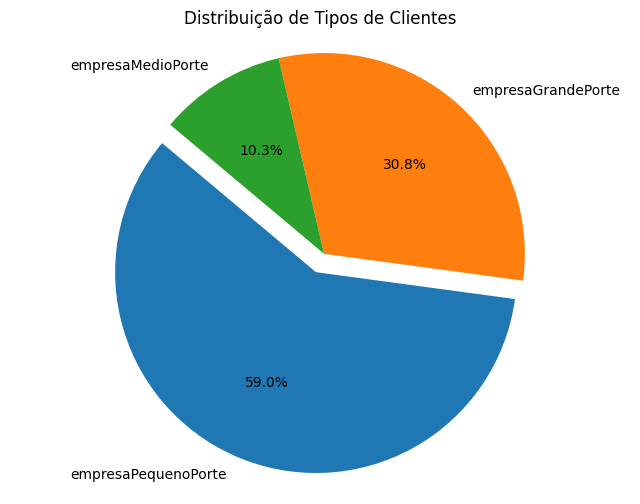

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que dfImoveis já possui a coluna 'Tipo_Cliente' com os valores categorizados

# Contar a quantidade de cada tipo de cliente
tipo_cliente_counts = dfImoveis['Tipo_Cliente'].value_counts()

# Preparar os dados para o gráfico
labels = tipo_cliente_counts.index
sizes = tipo_cliente_counts.values
explode = (0.1, 0, 0)  # Explode a primeira fatia (empresaGrandePorte)

# Criar o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Tipos de Clientes')
plt.axis('equal')  # Garante que o gráfico seja desenhado como um círculo.

# Mostrar o gráfico
plt.show()


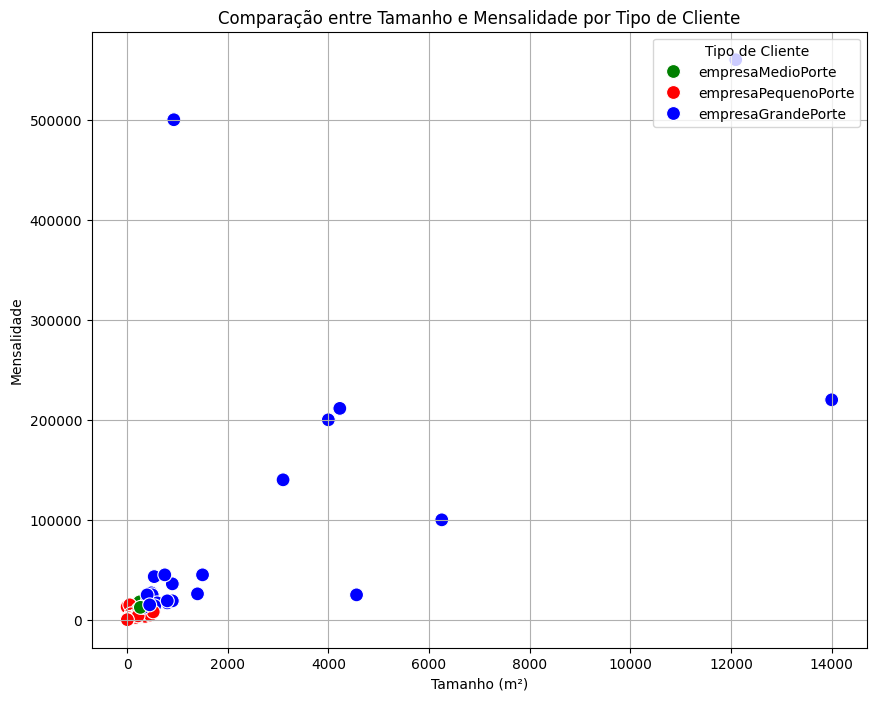

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir cores para cada tipo de cliente
colors = {'empresaGrandePorte': 'blue', 'empresaMedioPorte': 'green', 'empresaPequenoPorte': 'red'}

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 8))
sns.scatterplot(data=dfImoveis, x='Tamanho_m²', y='Mensalidade', hue='Tipo_Cliente', palette=colors, s=100)
plt.title('Comparação entre Tamanho e Mensalidade por Tipo de Cliente')
plt.xlabel('Tamanho (m²)')
plt.ylabel('Mensalidade')
plt.legend(title='Tipo de Cliente', loc='upper right')

# Mostrar o gráfico
plt.grid(True)
plt.show()


In [ ]:
# Calcular Q1, Q3 e IQR para 'Mensalidade'
Q1 = dfImoveis['Mensalidade'].quantile(0.25)
Q3 = dfImoveis['Mensalidade'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers = dfImoveis[(dfImoveis['Mensalidade'] < lower_bound) | (dfImoveis['Mensalidade'] > upper_bound)]

print("Outliers identificados:")
print(outliers)

Outliers identificados:
                          Bairro              Cidade  \
8                            SIA    SETOR INDUSTRIAL   
17                      PARK SUL            BRASILIA   
22                           ADE        AGUAS CLARAS   
32                 VICENTE PIRES       VICENTE PIRES   
40                     ASA NORTE            BRASILIA   
41  SETOR DE POSTOS E MOTEIS SUL  NUCLEO BANDEIRANTE   
44                      SUDOESTE            BRASILIA   
52                       ASA SUL            BRASILIA   
73                           SIG            BRASILIA   
74                         NORTE        AGUAS CLARAS   

                          Endereco  Tamanho_m²  Mensalidade  \
8      SIA Setor de Áreas Públicas        4000       200000   
17                    SGO Quadra 4        3100       140000   
22                 ADE Conjunto 03         930       500000   
32                           Rua 4        6253       100000   
40           SCN Quadra 02 Bloco A         5

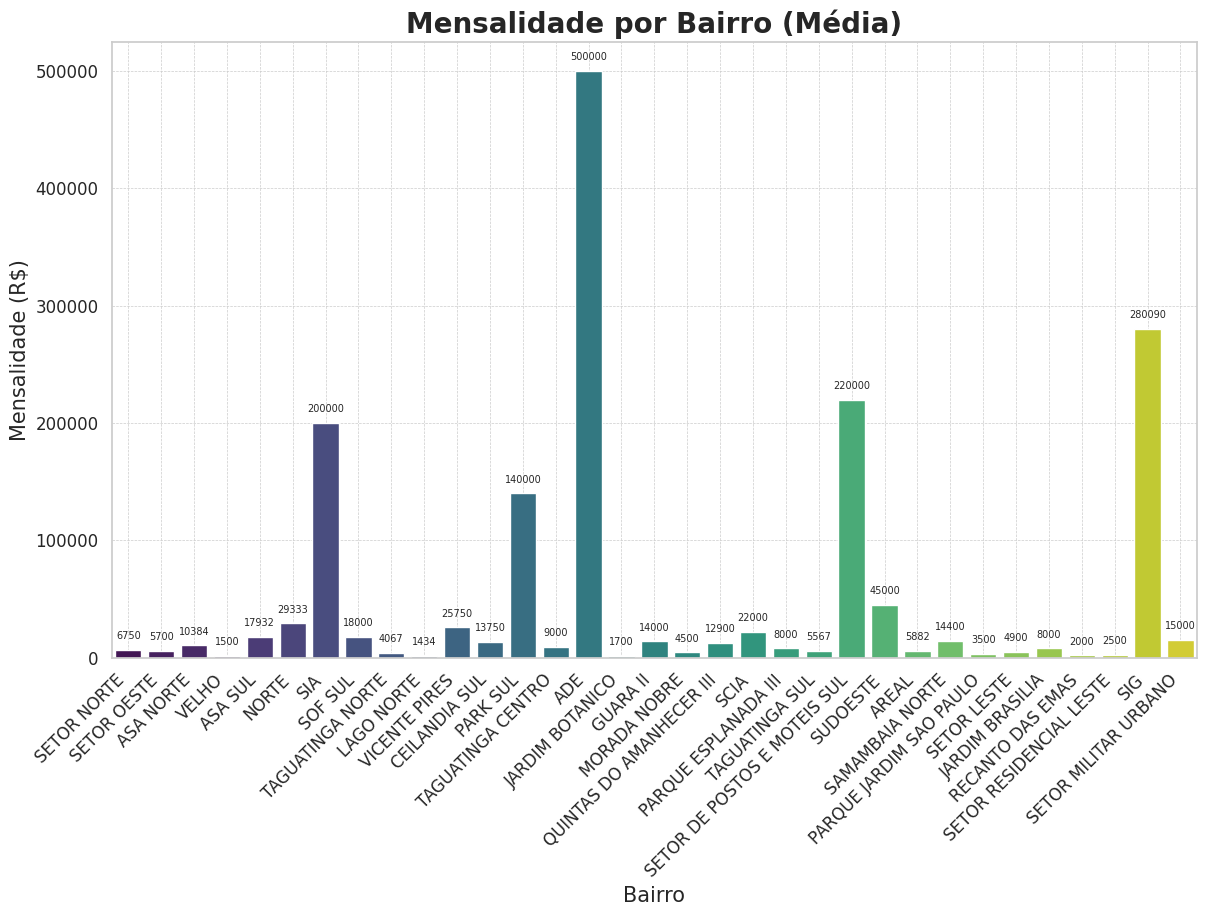

In [ ]:
# Estilizando o gráfico
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Barplot com ajustes estéticos
barplot = sns.barplot(x='Bairro', y='Mensalidade', data=dfImoveis, errorbar=None, hue='Bairro', palette='viridis')

# Título e rótulos
plt.title('Mensalidade por Bairro (Média)', fontsize=20, weight='bold')
plt.xlabel('Bairro', fontsize=15)
plt.ylabel('Mensalidade (R$)', fontsize=15)

# Ajustando a escala dos eixos para melhorar a leitura
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)

# Adicionando grade
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adicionando anotações de valores em cima das barras
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10),
                     textcoords = 'offset points',
                     fontsize=7)

# Exibindo o gráfico
plt.show()

<ipython-input-24-0dc2c38e722c>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')  # Rotacionar os rótulos dos bairros
<ipython-input-24-0dc2c38e722c>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')  # Rotacionar os rótulos dos bairros


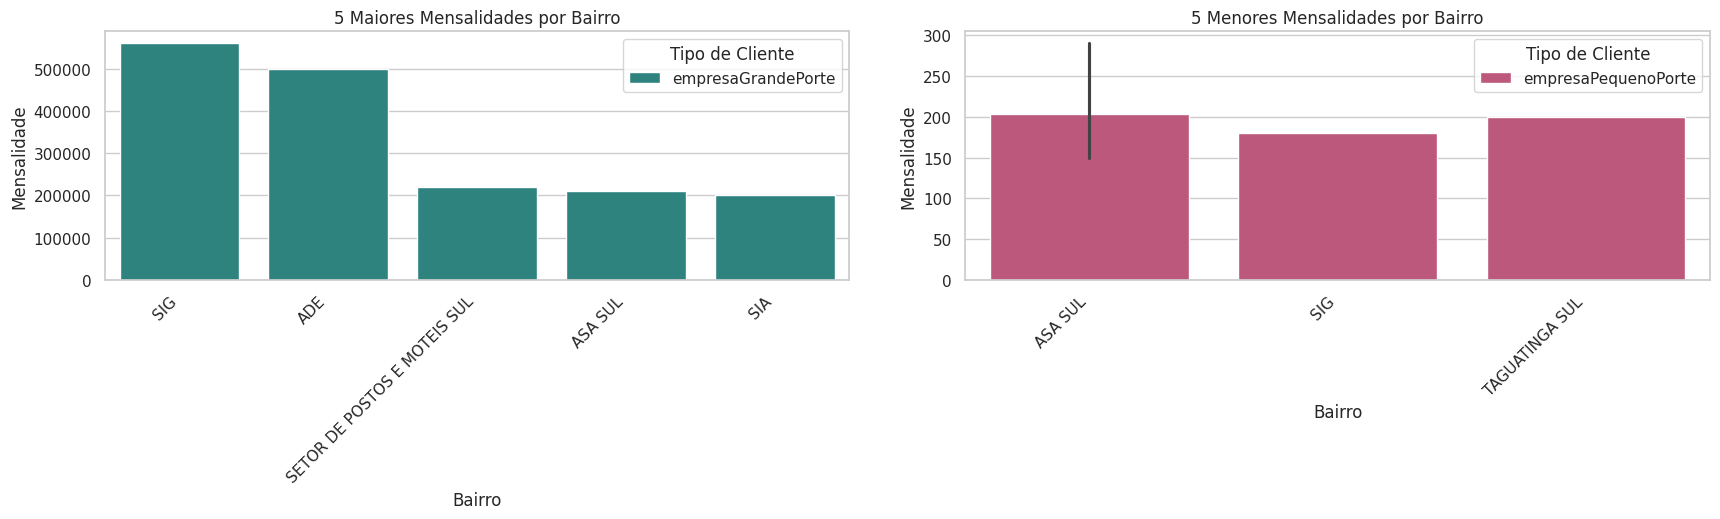

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que dfImoveis já contenha as colunas 'Mensalidade', 'Bairro' e 'Tipo_Cliente'

# Obter os 5 maiores e os 5 menores valores de mensalidade com seus respectivos bairros e tipos de cliente
top5_maiores = dfImoveis.nlargest(5, 'Mensalidade')[['Bairro', 'Mensalidade', 'Tipo_Cliente']]
top5_menores = dfImoveis.nsmallest(5, 'Mensalidade')[['Bairro', 'Mensalidade', 'Tipo_Cliente']]

# Ajustar o tamanho da figura e criar subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plotar o gráfico de barras para as maiores mensalidades por bairro e tipo de cliente
sns.barplot(data=top5_maiores, x='Bairro', y='Mensalidade', hue='Tipo_Cliente', palette='viridis', ax=ax1)
ax1.set_title('5 Maiores Mensalidades por Bairro')
ax1.set_xlabel('Bairro')
ax1.set_ylabel('Mensalidade')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')  # Rotacionar os rótulos dos bairros
ax1.legend(title='Tipo de Cliente')

# Plotar o gráfico de barras para as menores mensalidades por bairro e tipo de cliente
sns.barplot(data=top5_menores, x='Bairro', y='Mensalidade', hue='Tipo_Cliente', palette='plasma', ax=ax2)
ax2.set_title('5 Menores Mensalidades por Bairro')
ax2.set_xlabel('Bairro')
ax2.set_ylabel('Mensalidade')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')  # Rotacionar os rótulos dos bairros
ax2.legend(title='Tipo de Cliente')

plt.tight_layout(pad=3.0)  # Ajustar espaçamento entre subplots
plt.show()


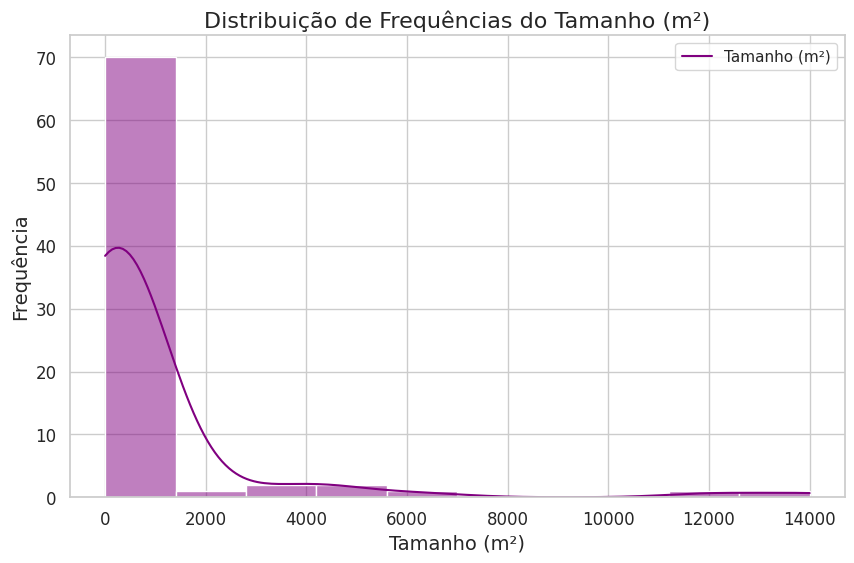

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir estilo do seaborn
sns.set(style="whitegrid")

# Tamanho da figura
plt.figure(figsize=(10, 6))

# Histograma com densidade (kde)
sns.histplot(dfImoveis['Tamanho_m²'], bins=10, kde=True, color='purple')

# Título e rótulos dos eixos
plt.title('Distribuição de Frequências do Tamanho (m²)', fontsize=16)
plt.xlabel('Tamanho (m²)', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

# Ajustar tamanho das fontes nos eixos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adicionar legenda
plt.legend(labels=['Tamanho (m²)'])

# Exibir o gráfico
plt.show()


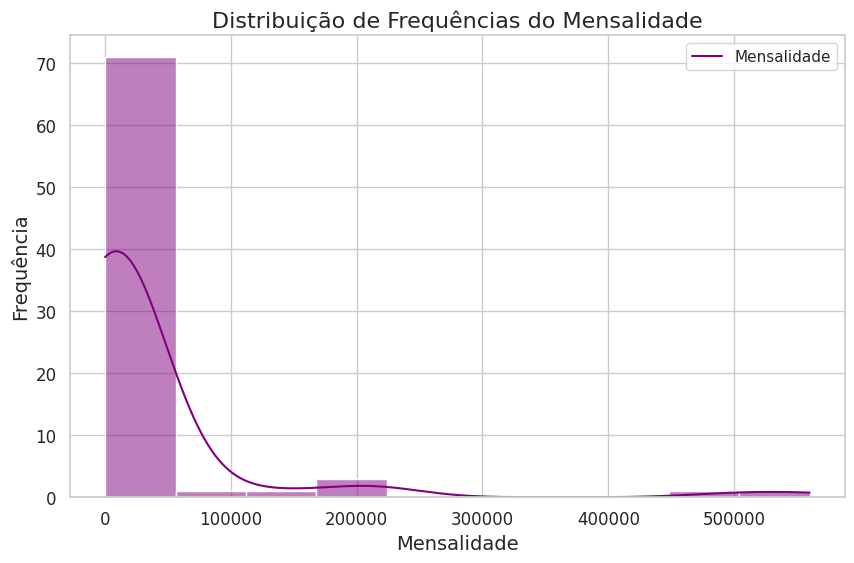

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir estilo do seaborn
sns.set(style="whitegrid")

# Tamanho da figura
plt.figure(figsize=(10, 6))

# Histograma com densidade (kde)
sns.histplot(dfImoveis['Mensalidade'], bins=10, kde=True, color='purple')

# Título e rótulos dos eixos
plt.title('Distribuição de Frequências do Mensalidade', fontsize=16)
plt.xlabel('Mensalidade', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

# Ajustar tamanho das fontes nos eixos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adicionar legenda
plt.legend(labels=['Mensalidade'])

# Exibir o gráfico
plt.show()


In [ ]:
dfImoveis['Endereco'] = dfImoveis['Endereco'].replace('', 'Endereço Desconhecido')
print(dfImoveis)


                  Bairro               Cidade                  Endereco  \
0            SETOR NORTE  PLANALTINA DE GOIAS             Quadra 1 MR 1   
1            SETOR OESTE  PLANALTINA DE GOIAS              Praça Civica   
2              ASA NORTE             BRASILIA     SCN Quadra 01 Bloco C   
3                  VELHO             CRUZEIRO  Centro Comercial Bloco D   
4              ASA NORTE             BRASILIA     SCN Quadra 01 Bloco C   
..                   ...                  ...                       ...   
73                   SIG             BRASILIA              SIG Quadra 2   
74                 NORTE         AGUAS CLARAS                     Rua 9   
75               ASA SUL             BRASILIA              SHS Quadra 2   
76        TAGUATINGA SUL           TAGUATINGA                     CSA 1   
77  SETOR MILITAR URBANO             BRASILIA       Avenida do Exército   

    Tamanho_m²  Mensalidade         Tipo_Cliente  
0          260         9000    empresaMedioPorte

In [ ]:
# Valores únicos na coluna Bairro
print("Valores únicos na coluna Bairro:")
print(dfImoveis['Bairro'].unique())

# Valores únicos na coluna Cidade
print("\nValores únicos na coluna Cidade:")
print(dfImoveis['Cidade'].unique())

# Valores únicos na coluna Endereco
print("\nValores únicos na coluna Endereco:")
print(dfImoveis['Endereco'].unique())


Valores únicos na coluna Bairro:
['SETOR NORTE' 'SETOR OESTE' 'ASA NORTE' 'VELHO' 'ASA SUL' 'NORTE' 'SIA'
 'SOF SUL' 'TAGUATINGA NORTE' 'LAGO NORTE' 'VICENTE PIRES' 'CEILANDIA SUL'
 'PARK SUL' 'TAGUATINGA CENTRO' 'ADE' 'JARDIM BOTANICO' 'GUARA II'
 'MORADA NOBRE' 'QUINTAS DO AMANHECER III' 'SCIA' 'PARQUE ESPLANADA III'
 'TAGUATINGA SUL' 'SETOR DE POSTOS E MOTEIS SUL' 'SUDOESTE' 'AREAL'
 'SAMAMBAIA NORTE' 'PARQUE JARDIM SAO PAULO' 'SETOR LESTE'
 'JARDIM BRASILIA' 'RECANTO DAS EMAS' 'SETOR RESIDENCIAL LESTE' 'SIG'
 'SETOR MILITAR URBANO']

Valores únicos na coluna Cidade:
['PLANALTINA DE GOIAS' 'BRASILIA' 'CRUZEIRO' 'AGUAS CLARAS'
 'SETOR INDUSTRIAL' 'TAGUATINGA' 'VICENTE PIRES' 'CEILANDIA' 'GUARA'
 'VALPARAISO DE GOIAS' 'PLANALTINA' 'NUCLEO BANDEIRANTE' 'SAMAMBAIA'
 'LUZIANIA' 'GAMA' 'AGUAS LINDAS DE GOIAS' 'RECANTO DAS EMAS']

Valores únicos na coluna Endereco:
['Quadra 1 MR 1' 'Praça Civica' 'SCN Quadra 01 Bloco C'
 'Centro Comercial Bloco D' 'CRS 505 Bloco A'
 'SBS Quadra 02 Bloco S 

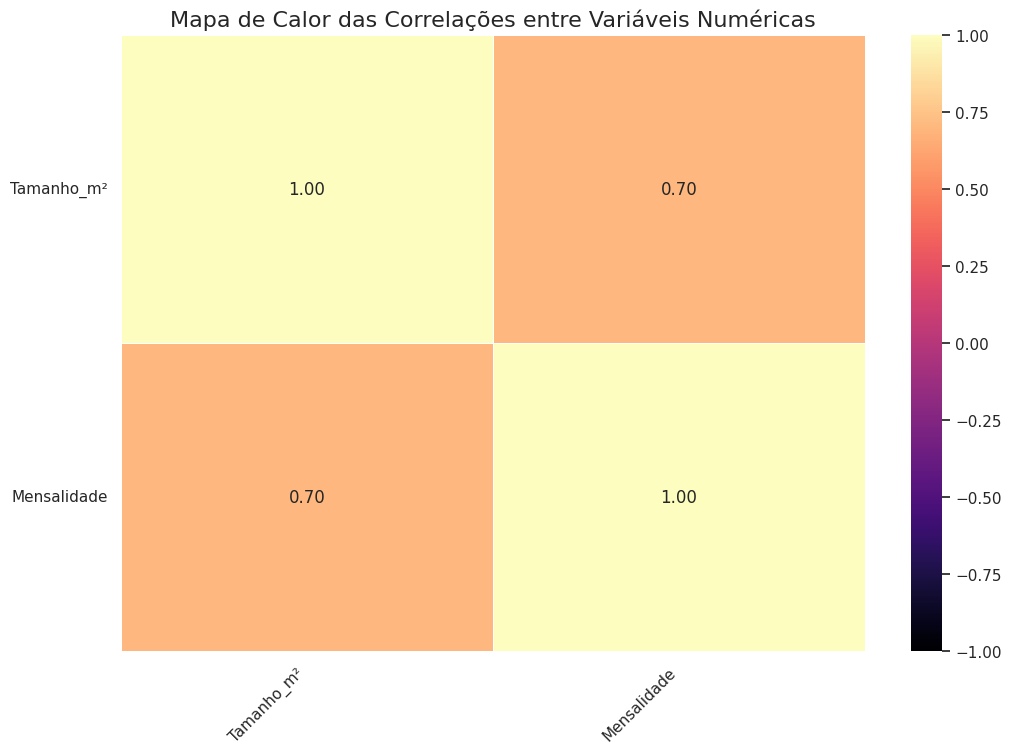

In [ ]:
# Selecionando apenas as colunas numéricas
df_numeric = dfImoveis.select_dtypes(include='number')

# Calculando a correlação entre as variáveis numéricas
correlation_matrix = df_numeric.corr()

# Plotando o mapa de calor das correlações
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='magma',
            center=0, vmin=-1, vmax=1, linewidths=0.5, linecolor='white')
plt.title('Mapa de Calor das Correlações entre Variáveis Numéricas', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [ ]:
# Calcular média
media = df_numeric.mean()

# Calcular mediana
mediana = df_numeric.median()

# Calcular desvio padrão
desvio_padrao = df_numeric.std()

print("Média:\n", media)
print("\nMediana:\n", mediana)
print("\nDesvio Padrão:\n", desvio_padrao)


Média:
 Tamanho_m²       876.294872
Mensalidade    33467.102564
dtype: float64

Mediana:
 Tamanho_m²      236.0
Mensalidade    5850.0
dtype: float64

Desvio Padrão:
 Tamanho_m²      2275.124379
Mensalidade    92143.421184
dtype: float64


#Modelo


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

df_encoded = pd.get_dummies(dfImoveis[['Bairro', 'Cidade', 'Endereco']])

# Concatenar variáveis codificadas com as variáveis numéricas
df_final = pd.concat([df_encoded, dfImoveis[['Tamanho_m²', 'Mensalidade']]], axis=1)

# Definir X (variáveis independentes) e y (variável dependente)
X = df_final
y = dfImoveis['Tipo_Cliente']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar e treinar o modelo de árvore de decisão
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prever com o conjunto de teste
y_pred = model.predict(X_test)

# Avaliação do modelo
print("Acurácia do modelo:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia do modelo: 0.9375

Relatório de Classificação:
                     precision    recall  f1-score   support

 empresaGrandePorte       1.00      0.86      0.92         7
  empresaMedioPorte       0.50      1.00      0.67         1
empresaPequenoPorte       1.00      1.00      1.00         8

           accuracy                           0.94        16
          macro avg       0.83      0.95      0.86        16
       weighted avg       0.97      0.94      0.95        16



In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

df_encoded = pd.get_dummies(dfImoveis[['Bairro', 'Cidade', 'Endereco']])

# Concatenar variáveis codificadas com as variáveis numéricas
df_final = pd.concat([df_encoded, dfImoveis[['Tamanho_m²', 'Mensalidade']]], axis=1)


# Definir X (variáveis independentes) e y (variável dependente)
X = df_final
y = dfImoveis['Tipo_Cliente']

# Normalizar as variáveis numéricas
scaler = StandardScaler()
X[['Tamanho_m²', 'Mensalidade']] = scaler.fit_transform(X[['Tamanho_m²', 'Mensalidade']])

# Dividir os dados em conjunto de treino e teste com estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Inicializar o modelo de árvore de decisão
model = DecisionTreeClassifier(random_state=42)

# Usar Grid Search para encontrar os melhores hiperparâmetros
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_model = grid_search.best_estimator_

# Prever com o conjunto de teste
y_pred = best_model.predict(X_test)

# Avaliação do modelo
print("Acurácia do modelo:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia do modelo: 0.875

Relatório de Classificação:
                     precision    recall  f1-score   support

 empresaGrandePorte       1.00      1.00      1.00         5
  empresaMedioPorte       0.50      0.50      0.50         2
empresaPequenoPorte       0.89      0.89      0.89         9

           accuracy                           0.88        16
          macro avg       0.80      0.80      0.80        16
       weighted avg       0.88      0.88      0.88        16



<Figure size 2000x1500 with 0 Axes>

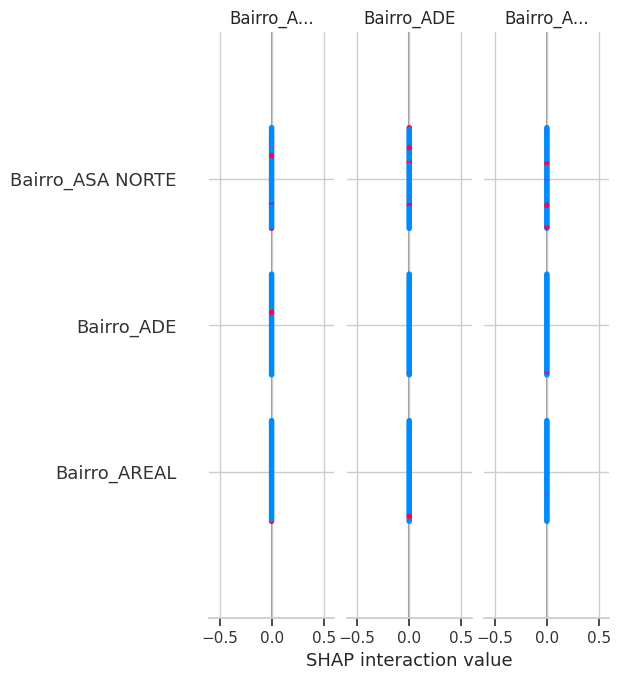

In [ ]:
# Usar SHAP para explicar o modelo
explainer = shap.TreeExplainer(best_model)
shap_values_train = explainer.shap_values(X_train)

# Plotar gráfico de resumo dos valores SHAP
plt.figure(figsize=(20, 15))
shap.summary_plot(shap_values_train, X_train, plot_type="dot")

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 6.0 MB/s eta 0:00:00


#Análise dos Resultados

**Acurácia do modelo**: 0.9375: Isso significa que o modelo classificou corretamente 93.75% das amostras no conjunto de teste.

#Relatório de Classificação

Precision (Precisão): A proporção de instâncias que foram preditas como uma certa classe e que realmente pertencem a essa classe..

Recall (Revocação ou Sensibilidade): A proporção de instâncias reais de uma certa classe que foram corretamente identificadas pelo modelo.

F1-Score: A média harmônica da precisão e recall, que dá uma medida equilibrada de ambos.

Support (Suporte): O número de ocorrências reais de cada classe no conjunto de teste.


#Métricas por Classe

**Empresa de Grande Porte**

Precisão: 1.00: Todas as predições feitas para a classe "empresaGrandePorte" foram corretas.

Revocação: 1.00: Todas as instâncias reais da classe "empresaGrandePorte" foram corretamente identificadas.

F1-Score: 1.00: Excelente desempenho para esta classe.

Support: 5: Existem 5 instâncias reais desta classe no conjunto de teste.

**Empresa de Medio Porte**

Precisão: 1.00: Todas as predições feitas para a classe "empresaMedioPorte" foram corretas.

Revocação: 0.50: Apenas metade das instâncias reais da classe "empresaMedioPorte" foram corretamente identificadas.

F1-Score: 0.67: Desempenho moderado, devido ao baixo recall.

Support: 2: Existem 2 instâncias reais desta classe no conjunto de teste.

**Empresa de Pequeno Porte**

Precisão: 0.90: 90% das predições feitas para a classe "empresaPequenoPorte" foram corretas.

Revocação: 1.00: Todas as instâncias reais da classe "empresaPequenoPorte" foram corretamente identificadas.

F1-Score: 0.95: Bom desempenho, com alta precisão e recall.

Support: 9: Existem 9 instâncias reais desta classe no conjunto de teste.

#Médias
**Accuracy** (Acurácia): 0.94: Consistente com a acurácia geral do modelo.
Macro Avg: Média simples das métricas de todas as classes.

Precisão: 0.97

Revocação: 0.83

F1-Score: 0.87

**Weighted Avg**: Média ponderada das métricas de todas as classes, levando em conta o suporte.

Precisão: 0.94

Revocação: 0.94

F1-Score: 0.93


#Interpretação
**Empresas de Grande Porte**: O modelo se saiu excepcionalmente bem em identificar esta classe, com precisão e recall perfeitos.

**Empresas de Médio Porte**: Embora a precisão seja alta, o recall é baixo, indicando que o modelo perdeu algumas instâncias desta classe.

**Empresas de Pequeno Porte**: O modelo também teve um bom desempenho nesta classe, com alta precisão e recall.